## Excersise 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os

path = os.getcwd() + '\data\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['QC 1', 'QC 2', 'Passed'])
# plot the data
print(data.head())

positive = data[data['Passed'].isin([1])]
negative = data[data['Passed'].isin([0])]

        QC 1       QC 2  Passed
0  84.623660  48.024693       0
1  90.286711  41.894998       0
2  75.847409  32.902198       0
3  40.182599  36.308552       1
4  39.032736  35.344376       1


<Axes: xlabel='QC 1', ylabel='QC 2'>

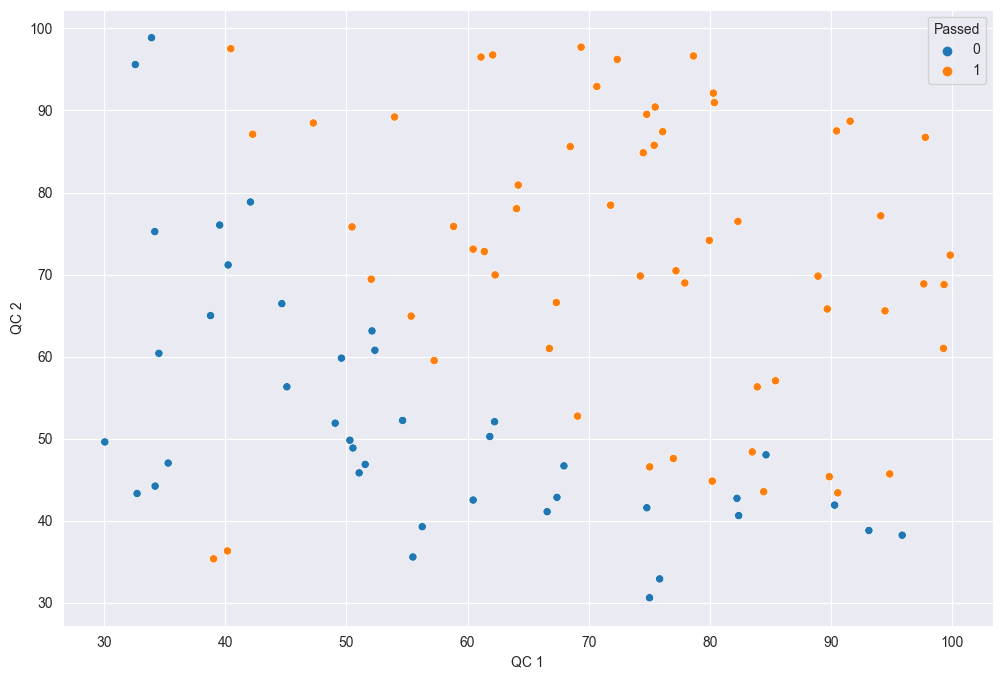

In [2]:
#============== PART A: PLOT THE DATA ==================================

# make a scatter plot as shown in the example (see matplotlib documentation for details)
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(data, x="QC 1", y ="QC 2", hue="Passed", ax=ax)

Text(0.5, 1.0, 'Sigmoid function from -10 to 10')

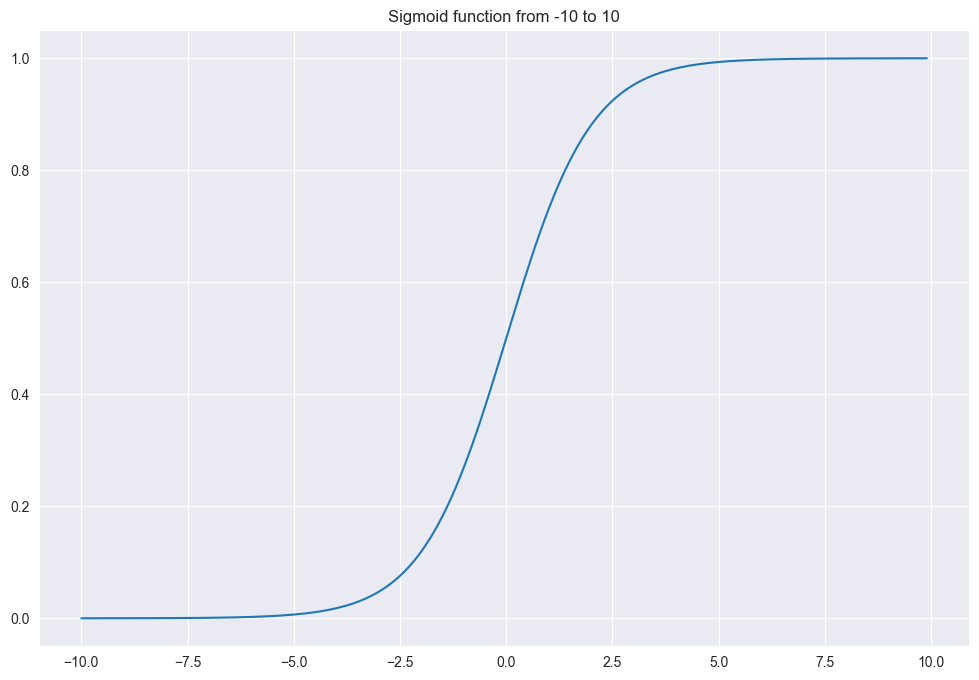

In [16]:
#============== PART B: PLOT THE SIGMOID FUNCTION =======================

# add the missing code to plot the sigmoid function below (again, see matplotlib documentation for details)
def sigmoid(z):
    return 1/(1+np.exp(-z))

nums = np.arange(-10, 10, step=0.1)
vals = [sigmoid(n) for n in nums]

fig, ax = plt.subplots(figsize=(12, 8))

#define the ax.plot below
g = sns.lineplot(x=nums, y=vals, ax=ax)
g.set_title("Sigmoid function from -10 to 10")

In [18]:
#============== PART C: CALCULATE THE COSTS =============================

# complete the cost function below

def cost(theta, X, y):
    y = y.reshape(y.shape[0], 1)
    H = sigmoid(np.matmul(X, theta))
    return (sum((y)*np.log(H) + (1-y)*np.log(1-H)) / len(X))

# add a 'ones' column for matrix multiplication (just as in exercise 1)
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:, 0:cols - 1]
y = data.iloc[:, cols - 1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

X.shape, theta.shape, y.shape

cost(theta, X, y)

cost1 = cost(theta, X, y)

print(cost1)


# compute the gradient (parameter updates) given our training data, labels, and some parameters theta

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:, i])
        grad[i] = np.sum(term) / len(X)

    return grad


gradient(theta, X, y)

[-0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0.69314718
 -0.69314718 -0.69314718 -0.69314718 -0.69314718 -0

array([ -0.1       , -10.95921659, -11.17284221])

In [ ]:
#============== PART D: FIND THE OPTIMAL VALUES ============================

# use SciPy's truncated newton (TNC) implementation to find the values
# complete the code below

import scipy.optimize as opt

result =

cost(result[0], X, y)

cost2 = cost(result[0], X, y)

print(cost2)

In [ ]:
#============== PART E: EVALUATE THE RESULTS ===============================

# Write a function that will output predictions for a dataset X using our learned parameters theta.
# Complete the predict function below

def predict(theta, X):
    probability =
    return [1 if x >= 0.5 else 0 for x in probability]


theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

In [ ]:
#============== PART F: EVALUATE THE RESULTS ===============================
# complete the code below

from sklearn import linear_model

model.fit(X, y.ravel())

print(model.score(X, y))









